In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('C:/training/subscriptionsData.csv', parse_dates=[3, 7])

### looking at the data first

In [3]:
df.head()

,subscriptionId,userId,planId,transactionDate,type,amountInCents,discountInCents,cancelledAt
0,53a1b046e4b0decc8d02dfd2,53a1ae57e4b0decc8d02dfcb,1MR,2014-06-18,PURCHASE,2900.0,0.0,NaT
1,53a157a0e4b0818da50005cc,53982547e4b035353949009c,1MR,2014-06-18,PURCHASE,2900.0,0.0,NaT
2,53a87993e4b0dd1cd0e865ae,53a8792ce4b0dd1cd0e865ad,1MR,2014-06-23,PURCHASE,3926.0,0.0,NaT
3,53b26c04e4b063f1a5435cf7,53a2f765e4b0582983b11a33,1MR,2014-07-01,PURCHASE,4495.0,0.0,NaT
4,53b40d1be4b00e812ea5b12c,5347a9b2e4b0dd1ab4b13ae8,1MR,2014-07-02,PURCHASE,4500.0,0.0,NaT


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6135 entries, 0 to 6134
Data columns (total 8 columns):
subscriptionId      6135 non-null object
 userId             4373 non-null object
 planId             4373 non-null object
 transactionDate    4373 non-null datetime64[ns]
 type               6135 non-null object
 amountInCents      4373 non-null float64
 discountInCents    4373 non-null float64
 cancelledAt        1762 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 383.5+ KB


In [6]:
df.columns

Index(['subscriptionId', ' userId', ' planId', ' transactionDate', ' type',
       ' amountInCents', ' discountInCents', ' cancelledAt'],
      dtype='object')

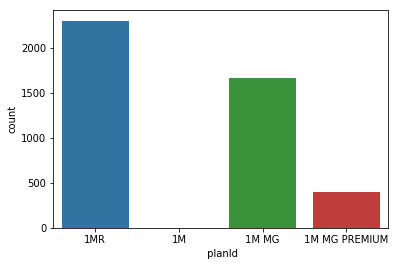

In [7]:
sns.countplot(df[' planId'])

In [8]:
df[' planId'].value_counts()

1MR              2302
1M MG            1668
1M MG PREMIUM     400
1M                  3
Name:  planId, dtype: int64

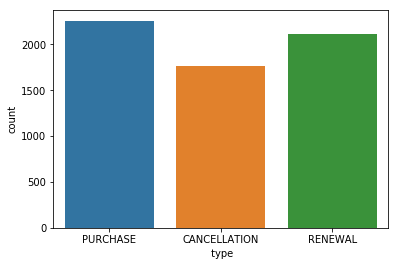

In [9]:
sns.countplot(df[' type'])

In [10]:
df.tail()

,subscriptionId,userId,planId,transactionDate,type,amountInCents,discountInCents,cancelledAt
6130,567e7253e4b0e8ed7b0f62aa,NaN,NaN,NaT,CANCELLATION,NaN,NaN,2015-12-26 10:57:00
6131,567fc970e4b0036c8946b74c,NaN,NaN,NaT,CANCELLATION,NaN,NaN,2015-12-27 11:21:00
6132,56818b32e4b0ad5e19e49315,NaN,NaN,NaT,CANCELLATION,NaN,NaN,2015-12-28 19:30:00
6133,56827fe6e4b08079b1f4c387,NaN,NaN,NaT,CANCELLATION,NaN,NaN,2015-12-29 13:02:00
6134,5638f9c6e4b08ec62ff5963c,NaN,NaN,NaT,CANCELLATION,NaN,NaN,2015-12-02 14:52:00


In [11]:
len(df['subscriptionId'].unique())

2257

#### Only 2257 unique customers, we have a lot of renewals and cancelations from the same customers

In [23]:
renewals = df[df[' type'] == 'RENEWAL']

In [25]:
df[df['subscriptionId'] == '54eb21ece4b0981e1ca6c285']

,subscriptionId,userId,planId,transactionDate,type,amountInCents,discountInCents,cancelledAt
40,54eb21ece4b0981e1ca6c285,54a6a86be4b00aa312d002b8,1MR,2015-02-23 12:49:00,PURCHASE,5200.0,0.0,NaT
189,54eb21ece4b0981e1ca6c285,54a6a86be4b00aa312d002b8,1MR,2015-03-23 23:55:00,RENEWAL,5200.0,0.0,NaT
356,54eb21ece4b0981e1ca6c285,54a6a86be4b00aa312d002b8,1MR,2015-04-23 23:55:00,RENEWAL,5200.0,0.0,NaT
682,54eb21ece4b0981e1ca6c285,54a6a86be4b00aa312d002b8,1MR,2015-05-23 23:55:00,RENEWAL,5200.0,0.0,NaT
1235,54eb21ece4b0981e1ca6c285,54a6a86be4b00aa312d002b8,1MR,2015-06-23 23:55:00,RENEWAL,5200.0,0.0,NaT
1918,54eb21ece4b0981e1ca6c285,NaN,NaN,NaT,CANCELLATION,NaN,NaN,2015-07-23 22:55:00


#### I'm going to ignore the renewals, i want to know when they started being customers and when they stoped

### The cancellations have a different column for the date, this needs to be solved

In [12]:
canceled = df[df[' type'] == 'CANCELLATION']

In [13]:
canceled[' transactionDate'] = canceled[' cancelledAt']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
canceled.head()

,subscriptionId,userId,planId,transactionDate,type,amountInCents,discountInCents,cancelledAt
10,53a1b046e4b0decc8d02dfd2,NaN,NaN,2014-07-18 21:13:00,CANCELLATION,NaN,NaN,2014-07-18 21:13:00
11,53a87993e4b0dd1cd0e865ae,NaN,NaN,2014-07-22 07:47:00,CANCELLATION,NaN,NaN,2014-07-22 07:47:00
12,53a157a0e4b0818da50005cc,NaN,NaN,2014-07-18 21:11:00,CANCELLATION,NaN,NaN,2014-07-18 21:11:00
21,53b26c04e4b063f1a5435cf7,NaN,NaN,2014-08-20 14:26:00,CANCELLATION,NaN,NaN,2014-08-20 14:26:00
22,53b40d1be4b00e812ea5b12c,NaN,NaN,2014-08-02 21:02:00,CANCELLATION,NaN,NaN,2014-08-02 21:02:00


In [15]:
df2 = pd.concat([df[df[' type'] == 'PURCHASE'], canceled])

In [16]:
df2.tail()

,subscriptionId,userId,planId,transactionDate,type,amountInCents,discountInCents,cancelledAt
6130,567e7253e4b0e8ed7b0f62aa,NaN,NaN,2015-12-26 10:57:00,CANCELLATION,NaN,NaN,2015-12-26 10:57:00
6131,567fc970e4b0036c8946b74c,NaN,NaN,2015-12-27 11:21:00,CANCELLATION,NaN,NaN,2015-12-27 11:21:00
6132,56818b32e4b0ad5e19e49315,NaN,NaN,2015-12-28 19:30:00,CANCELLATION,NaN,NaN,2015-12-28 19:30:00
6133,56827fe6e4b08079b1f4c387,NaN,NaN,2015-12-29 13:02:00,CANCELLATION,NaN,NaN,2015-12-29 13:02:00
6134,5638f9c6e4b08ec62ff5963c,NaN,NaN,2015-12-02 14:52:00,CANCELLATION,NaN,NaN,2015-12-02 14:52:00


### Now its easier to analyse it by time

In [17]:
df2 = df2.sort_values(by=' transactionDate')
df2 = df2.set_index(' transactionDate')

In [18]:
churn = df2[['subscriptionId', ' planId', ' amountInCents', ' discountInCents', ' cancelledAt']].groupby(pd.Grouper(freq='M')).agg(
            {'subscriptionId': 'count', ' amountInCents': 'sum', ' discountInCents': 'sum',' cancelledAt' :'count' }).reset_index()
churn

,transactionDate,subscriptionId,amountInCents,discountInCents,cancelledAt
0,2014-06-30,3,9726.0,0.0,0
1,2014-07-31,10,30245.0,0.0,3
2,2014-08-31,17,40912.0,0.0,9
3,2014-09-30,5,NaN,NaN,5
4,2014-10-31,1,3926.0,0.0,0
5,2014-11-30,1,NaN,NaN,1
6,2014-12-31,0,NaN,NaN,0
7,2015-01-31,1,NaN,NaN,1
8,2015-02-28,13,48104.0,0.0,1
9,2015-03-31,156,517628.0,0.0,19


In [32]:
churn['new_customers'] = churn['subscriptionId'] - churn[' cancelledAt']
churn['total_subscrip'] = churn['new_customers'].cumsum()
churn['total_cancel'] = churn[' cancelledAt'].cumsum()
churn['customers'] = churn['total_subscrip'] - churn['total_cancel']

churn['churn%'] = churn[' cancelledAt'] / churn['customers']

In [33]:
churn

,transactionDate,subscriptionId,amountInCents,discountInCents,cancelledAt,new_customers,total_subscrip,total_cancel,customers,churn%,ARPA,LTV
0,2014-06-30,3,9726.0,0.0,0,3,3,0,3,0.000000,32.420000,inf
1,2014-07-31,10,30245.0,0.0,3,7,10,3,7,0.428571,43.207143,1.008167
2,2014-08-31,17,40912.0,0.0,9,8,18,12,6,1.500000,51.140000,0.340933
3,2014-09-30,5,NaN,NaN,5,0,18,17,1,5.000000,NaN,NaN
4,2014-10-31,1,3926.0,0.0,0,1,19,17,2,0.000000,39.260000,inf
5,2014-11-30,1,NaN,NaN,1,0,19,18,1,1.000000,NaN,NaN
6,2014-12-31,0,NaN,NaN,0,0,19,18,1,0.000000,NaN,NaN
7,2015-01-31,1,NaN,NaN,1,0,19,19,0,inf,NaN,NaN
8,2015-02-28,13,48104.0,0.0,1,12,31,20,11,0.090909,40.086667,4.409533
9,2015-03-31,156,517628.0,0.0,19,137,168,39,129,0.147287,37.783066,2.565271


In [34]:
df2.head(38)[' type'].value_counts()

PURCHASE        19
CANCELLATION    19
Name:  type, dtype: int64

In [35]:
#  ARPA and LTV is calculated for new customers, it can be calculated for every customer easily too
churn['ARPA'] = churn[' amountInCents'] / churn['new_customers'] /100
churn['LTV'] = churn['ARPA'] / churn['churn%']

In [36]:
churn.tail()

,transactionDate,subscriptionId,amountInCents,discountInCents,cancelledAt,new_customers,total_subscrip,total_cancel,customers,churn%,ARPA,LTV
14,2015-08-31,501,1190602.0,46673.0,245,256,1232,851,381,0.643045,46.507891,72.324516
15,2015-09-30,559,1468532.0,276582.0,223,336,1568,1074,494,0.451417,43.706310,96.820255
16,2015-10-31,424,991855.0,156995.0,212,212,1780,1286,494,0.429150,46.785613,109.019306
17,2015-11-30,540,1421811.0,186289.0,230,310,2090,1516,574,0.400697,45.864871,114.462765
18,2015-12-31,413,711366.0,97805.0,246,167,2257,1762,495,0.496970,42.596766,85.713006


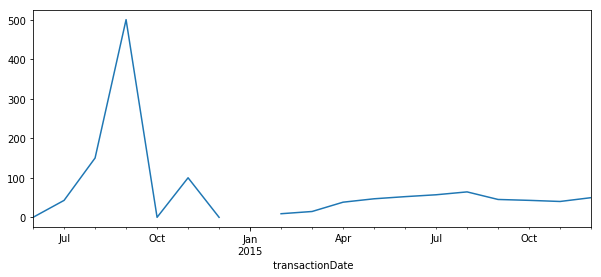

In [66]:
churn.set_index(' transactionDate')['churn%'].plot(figsize=(10,4));

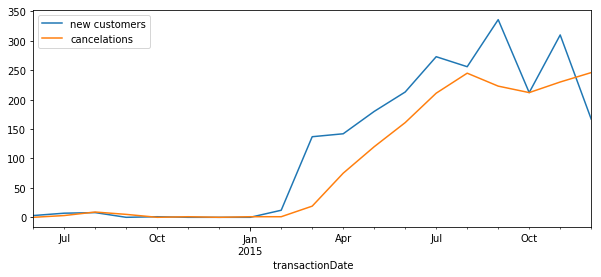

In [29]:
churn.set_index(' transactionDate')['new_customers'].plot(figsize=(10,4), label='new customers', legend=True)
churn.set_index(' transactionDate')[' cancelledAt'].plot(figsize=(10,4), label='cancelations', legend=True);

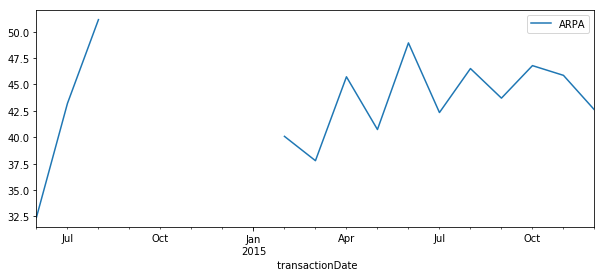

In [38]:
churn.set_index(' transactionDate')['ARPA'].plot(figsize=(10,4), label='ARPA', legend=True);

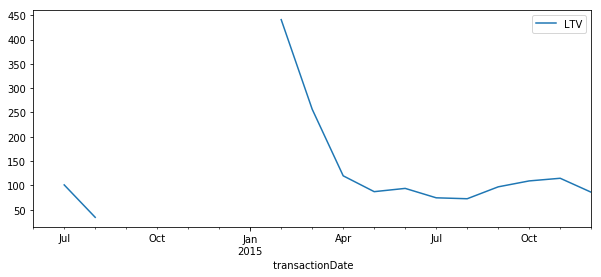

In [39]:
churn.set_index(' transactionDate')['LTV'].plot(figsize=(10,4), label='LTV', legend=True);

## More interesting would be to calculate this information for each type of plan but we dont have the plan that is being cancelled in the cancellation rows

In [40]:
# create a dictionary with the subscription and the plan id
not_canceled = df[df[' type'] != 'CANCELLATION']
dictionary = {}

for customer in not_canceled['subscriptionId']:
    dictionary[customer] = not_canceled[not_canceled['subscriptionId'] == customer][' planId'].values
    

In [41]:
dictionary

{'53a1b046e4b0decc8d02dfd2': array(['1MR'], dtype=object),
 '53a157a0e4b0818da50005cc': array(['1MR'], dtype=object),
 '53a87993e4b0dd1cd0e865ae': array(['1MR'], dtype=object),
 '53b26c04e4b063f1a5435cf7': array(['1MR'], dtype=object),
 '53b40d1be4b00e812ea5b12c': array(['1MR'], dtype=object),
 '53c93591e4b0d9444a41ab03': array(['1MR'], dtype=object),
 '53ceb51fe4b09c2a8ca63035': array(['1MR'], dtype=object),
 '53d113b3e4b01d8baa11dddf': array(['1MR'], dtype=object),
 '53d0f7f6e4b04dad5df24181': array(['1MR'], dtype=object),
 '53d79ff5e4b0e7997b52e2c9': array(['1MR'], dtype=object),
 '53db4fa3e4b07ca892d75e42': array(['1MR'], dtype=object),
 '53dcc134e4b0626f45cecc1b': array(['1MR'], dtype=object),
 '53df8327e4b01450b25a3898': array(['1MR'], dtype=object),
 '53e1fd2be4b05e2f9b964d6a': array(['1MR'], dtype=object),
 '53e5d6a7e4b0ea5458ada8ca': array(['1MR'], dtype=object),
 '53f85891e4b0aeba9cd1eca1': array(['1MR'], dtype=object),
 '53f9a623e4b0aa3e02fd087e': array(['1MR'], dtype=object

In [42]:
# replaces the nan in the column planId for the last plan subscibed by that customer
df2[' planId'] = df2.apply(lambda row: dictionary[row['subscriptionId']][-1] if type(row[' planId']) != str else row[' planId'], axis=1)

In [43]:
df2.head(10)

,subscriptionId,userId,planId,type,amountInCents,discountInCents,cancelledAt
transactionDate,,,,,,,
2014-06-18 00:00:00,53a1b046e4b0decc8d02dfd2,53a1ae57e4b0decc8d02dfcb,1MR,PURCHASE,2900.0,0.0,NaT
2014-06-18 00:00:00,53a157a0e4b0818da50005cc,53982547e4b035353949009c,1MR,PURCHASE,2900.0,0.0,NaT
2014-06-23 00:00:00,53a87993e4b0dd1cd0e865ae,53a8792ce4b0dd1cd0e865ad,1MR,PURCHASE,3926.0,0.0,NaT
2014-07-01 00:00:00,53b26c04e4b063f1a5435cf7,53a2f765e4b0582983b11a33,1MR,PURCHASE,4495.0,0.0,NaT
2014-07-02 00:00:00,53b40d1be4b00e812ea5b12c,5347a9b2e4b0dd1ab4b13ae8,1MR,PURCHASE,4500.0,0.0,NaT
2014-07-18 00:00:00,53c93591e4b0d9444a41ab03,530e02abe4b0806e7bd5e99f,1MR,PURCHASE,2900.0,0.0,NaT
2014-07-18 21:11:00,53a157a0e4b0818da50005cc,NaN,1MR,CANCELLATION,NaN,NaN,2014-07-18 21:11:00
2014-07-18 21:13:00,53a1b046e4b0decc8d02dfd2,NaN,1MR,CANCELLATION,NaN,NaN,2014-07-18 21:13:00
2014-07-22 00:00:00,53ceb51fe4b09c2a8ca63035,53c97354e4b0db3d8444f7b1,1MR,PURCHASE,2900.0,0.0,NaT


### Now we have the information we want

In [44]:
kpis = df2[['subscriptionId', ' planId', ' amountInCents', ' discountInCents', ' cancelledAt']].groupby(
          [pd.Grouper(freq='M'), ' planId']).agg({'subscriptionId': 'count', ' amountInCents': 'sum', 
                                                 ' discountInCents': 'sum',' cancelledAt' :'count' }).reset_index()
kpis

,transactionDate,planId,subscriptionId,amountInCents,discountInCents,cancelledAt
0,2014-06-30,1MR,3,9726.0,0.0,0
1,2014-07-31,1MR,10,30245.0,0.0,3
2,2014-08-31,1MR,17,40912.0,0.0,9
3,2014-09-30,1MR,5,NaN,NaN,5
4,2014-10-31,1MR,1,3926.0,0.0,0
5,2014-11-30,1MR,1,NaN,NaN,1
6,2015-01-31,1MR,1,NaN,NaN,1
7,2015-02-28,1MR,13,48104.0,0.0,1
8,2015-03-31,1M,2,4995.0,0.0,1
9,2015-03-31,1MR,154,512633.0,0.0,18


### I am going to look at only one plan, but it can be easily done the same for the others and compare

In [45]:
kpi_1mr = kpis[kpis[' planId'] == '1MR']
kpi_1mr

,transactionDate,planId,subscriptionId,amountInCents,discountInCents,cancelledAt
0,2014-06-30,1MR,3,9726.0,0.0,0
1,2014-07-31,1MR,10,30245.0,0.0,3
2,2014-08-31,1MR,17,40912.0,0.0,9
3,2014-09-30,1MR,5,NaN,NaN,5
4,2014-10-31,1MR,1,3926.0,0.0,0
5,2014-11-30,1MR,1,NaN,NaN,1
6,2015-01-31,1MR,1,NaN,NaN,1
7,2015-02-28,1MR,13,48104.0,0.0,1
9,2015-03-31,1MR,154,512633.0,0.0,18
12,2015-04-30,1MR,167,405639.0,0.0,75


In [46]:
kpi_1mr['new_customers'] = kpi_1mr['subscriptionId'] - kpi_1mr[' cancelledAt']
kpi_1mr['total_subscrip'] = kpi_1mr['new_customers'].cumsum()
kpi_1mr['total_cancel'] = kpi_1mr[' cancelledAt'].cumsum()
kpi_1mr['customers'] = kpi_1mr['total_subscrip'] - kpi_1mr['total_cancel']

kpi_1mr['churn%'] = kpi_1mr[' cancelledAt'] / kpi_1mr['customers']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [47]:
kpi_1mr

,transactionDate,planId,subscriptionId,amountInCents,discountInCents,cancelledAt,new_customers,total_subscrip,total_cancel,customers,churn%
0,2014-06-30,1MR,3,9726.0,0.0,0,3,3,0,3,0.000000
1,2014-07-31,1MR,10,30245.0,0.0,3,7,10,3,7,0.428571
2,2014-08-31,1MR,17,40912.0,0.0,9,8,18,12,6,1.500000
3,2014-09-30,1MR,5,NaN,NaN,5,0,18,17,1,5.000000
4,2014-10-31,1MR,1,3926.0,0.0,0,1,19,17,2,0.000000
5,2014-11-30,1MR,1,NaN,NaN,1,0,19,18,1,1.000000
6,2015-01-31,1MR,1,NaN,NaN,1,0,19,19,0,inf
7,2015-02-28,1MR,13,48104.0,0.0,1,12,31,20,11,0.090909
9,2015-03-31,1MR,154,512633.0,0.0,18,136,167,38,129,0.139535
12,2015-04-30,1MR,167,405639.0,0.0,75,92,259,113,146,0.513699


In [48]:
# ARPA and LTV is calculated for new customers, it can be calculated for every customer easily too
kpi_1mr['ARPA'] = kpi_1mr[' amountInCents'] / kpi_1mr['new_customers'] /100
kpi_1mr['LTV'] = kpi_1mr['ARPA'] / kpi_1mr['churn%']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
kpi_1mr

,transactionDate,planId,subscriptionId,amountInCents,discountInCents,cancelledAt,new_customers,total_subscrip,total_cancel,customers,churn%,ARPA,LTV
0,2014-06-30,1MR,3,9726.0,0.0,0,3,3,0,3,0.000000,32.420000,inf
1,2014-07-31,1MR,10,30245.0,0.0,3,7,10,3,7,0.428571,43.207143,100.816667
2,2014-08-31,1MR,17,40912.0,0.0,9,8,18,12,6,1.500000,51.140000,34.093333
3,2014-09-30,1MR,5,NaN,NaN,5,0,18,17,1,5.000000,NaN,NaN
4,2014-10-31,1MR,1,3926.0,0.0,0,1,19,17,2,0.000000,39.260000,inf
5,2014-11-30,1MR,1,NaN,NaN,1,0,19,18,1,1.000000,NaN,NaN
6,2015-01-31,1MR,1,NaN,NaN,1,0,19,19,0,inf,NaN,NaN
7,2015-02-28,1MR,13,48104.0,0.0,1,12,31,20,11,0.090909,40.086667,440.953333
9,2015-03-31,1MR,154,512633.0,0.0,18,136,167,38,129,0.139535,37.693603,270.137488
12,2015-04-30,1MR,167,405639.0,0.0,75,92,259,113,146,0.513699,44.091196,85.830861


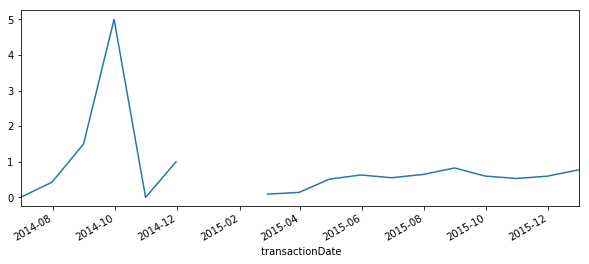

In [50]:
kpi_1mr.set_index(' transactionDate')['churn%'].plot(figsize=(10,4));

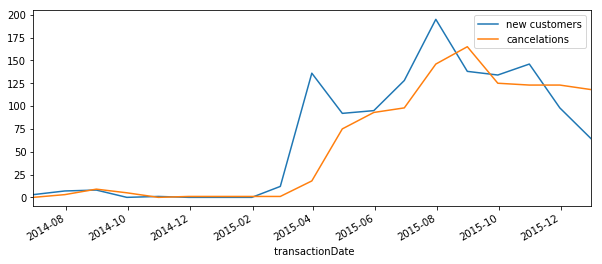

In [51]:
kpi_1mr.set_index(' transactionDate')['new_customers'].plot(figsize=(10,4), label='new customers', legend=True)
kpi_1mr.set_index(' transactionDate')[' cancelledAt'].plot(figsize=(10,4), label='cancelations', legend=True);

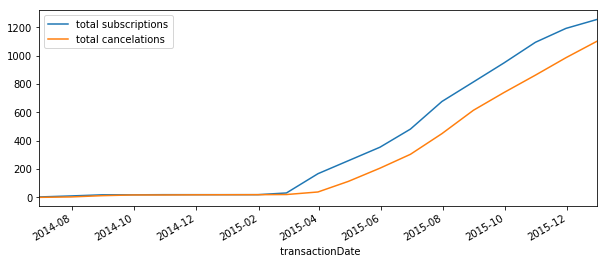

In [52]:
kpi_1mr.set_index(' transactionDate')['total_subscrip'].plot(figsize=(10,4), label='total subscriptions', legend=True)
kpi_1mr.set_index(' transactionDate')['total_cancel'].plot(figsize=(10,4), label='total cancelations', legend=True);

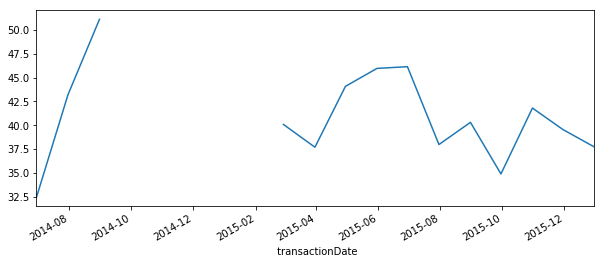

In [109]:
kpi_1mr.set_index(' transactionDate')['ARPA'].plot(figsize=(10,4));